In [1]:
# os - operating system
import os
# io - input/output
import io
#pandas - data manipulation
import pandas as pd
#algorithm used
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#data manipulation
import numpy as np

In [2]:
#reading the dataset
path = 'emails/'
for root, folder, fileName in os.walk(path):
#     print(root,folder,fileName)
    pass

In [3]:
fileName[0]

'00001.7848dde101aa985090474a91ec93fcf0'

In [4]:
#extracting the exact path for the dataset
for root, folder, fileName in os.walk(path):
    for file in fileName:
#         print(os.path.join(root,file))
        path = os.path.join(root,file)

In [5]:
path

'emails/spam\\00500.85b72f09f6778a085dc8b6821965a76f'

In [6]:
file_1 = 'emails/ham/00002.9c4069e25e1ef370c078db7ee85ff9ac'

In [7]:
#reading the ham e-mails from the ham folder
inBody = False
lines = []
f = io.open(file_1,'r')
for line in f:
#     print(line)
    if inBody == True:
        lines.append(line)
#         print(lines)
    elif line == "\n":
        inBody = True
f.close()

In [8]:
print(lines)

['Martin A posted:\n', 'Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the\n', ' limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the\n', ' Mount Athos monastic community, was ideal for the patriotic sculpture. \n', ' \n', " As well as Alexander's granite features, 240 ft high and 170 ft wide, a\n", ' museum, a restored amphitheatre and car park for admiring crowds are\n', 'planned\n', '---------------------\n', 'So is this mountain limestone or granite?\n', "If it's limestone, it'll weather pretty fast.\n", '\n', '------------------------ Yahoo! Groups Sponsor ---------------------~-->\n', '4 DVDs Free +s&p Join Now\n', 'http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM\n', '---------------------------------------------------------------------~->\n', '\n', 'To unsubscribe from this group, send an email to:\n', 'forteana-unsubscribe@egroups.com\n', '\n', ' \n', '\n', 'Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/

In [9]:
print(len(lines))

26


In [10]:
#reading e-mails from spam folder
def readFile(path):
    for root, folder, files in os.walk(path):
        for fileName in files:
            file = os.path.join(root,fileName)
            
            inBody = False
            lines = []
            f = io.open(file,'r',encoding='latin1')
            for line in f:
            #     print(line)
                if inBody == True:
                    lines.append(line)
            #         print(lines)
                elif line == "\n":
                    inBody = True
            f.close()
            message = "\n".join(lines)
            yield message, path

In [11]:
#function to build dataframe
def buildDataFrame(path, classification):
    
    row = []
    index = []
    
    for message, filename in readFile(path):
        row.append({'message':message, "class":classification})
        index.append(filename)
        
    return pd.DataFrame(data=row, index=index)

In [12]:
#building Dataframe from both ham and spam e-mails dataset
dataset = pd.DataFrame({'message':[], 'class':[]})

dataset = dataset.append(buildDataFrame('emails/spam', 'spam'))
dataset = dataset.append(buildDataFrame('emails/ham', 'ham'))

In [13]:
#number of rows and columns in the dataset
dataset.shape

(3000, 2)

In [14]:
#First 10 lines of merged e-mails dataset
dataset.head(10)

,message,class
emails/spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",spam
emails/spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
emails/spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
emails/spam,##############################################...,spam
emails/spam,I thought you might like these:\n\n1) Slim Dow...,spam
emails/spam,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,spam
emails/spam,Help wanted. We are a 14 year old fortune 500...,spam
emails/spam,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,spam
emails/spam,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,spam
emails/spam,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",spam


In [15]:
#Counting the category of e-mails
print("The count of each category of e-mails")
dataset['class'].value_counts()


The count of each category of e-mails


ham     2500
spam     500
Name: class, dtype: int64

Text(0.5, 1.0, 'Percentage of Ham and Spam Emails')

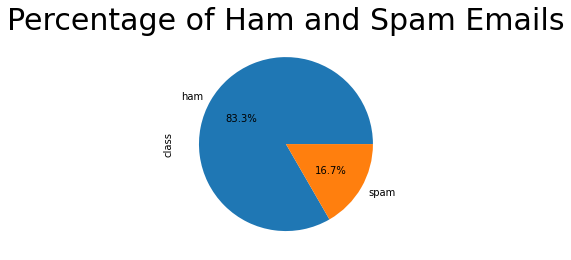

In [16]:
#Visualizing the precetnage of e-mails of different category.
dataset['class'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Percentage of Ham and Spam Emails",fontsize=30)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, emails/spam to emails/ham
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  3000 non-null   object
 1   class    3000 non-null   object
dtypes: object(2)
memory usage: 70.3+ KB


In [18]:
#Adding a new column in the dataset
dataset['mails_length'] = dataset['message'].apply(len)
dataset.head()

,message,class,mails_length
emails/spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",spam,3966
emails/spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam,820
emails/spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam,669
emails/spam,##############################################...,spam,3004
emails/spam,I thought you might like these:\n\n1) Slim Dow...,spam,687


In [19]:
#Statistical Decription of the dataset
dataset.groupby('class').describe()

mails_length                                                           \
             count       mean           std   min      25%     50%      75%   
class                                                                         
ham         2500.0  1486.1104   3475.300719  54.0   459.75   899.0  1567.50   
spam         500.0  5746.9680  15861.429791  65.0  1082.00  2578.5  5619.75   

                 
            max  
class            
ham     89733.0  
spam   234358.0

In [20]:
#Data Visualisation

C:\Users\Public\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Public\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0, 0.5, 'Frequency of e-mails')

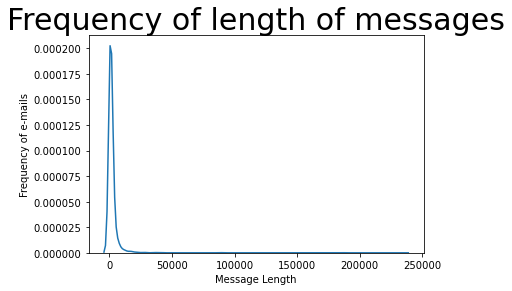

In [21]:
#Graph representing the lengths of the dataset
bins=[5,10,15,20,25]
sns.distplot(a=dataset['mails_length'],bins=bins)
plt.title("Frequency of length of messages",fontsize=30)
plt.xlabel("Message Length")
plt.ylabel("Frequency of e-mails")

In [22]:
!pip3 install wordcloud

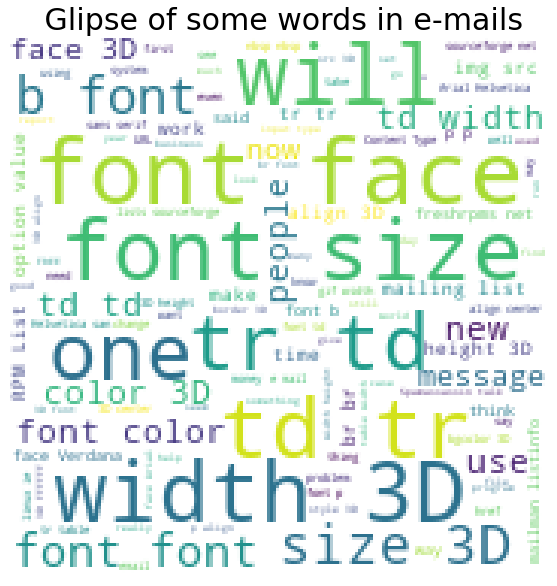

In [23]:
#Generating word clouds of e-mails
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(10,10))


sub_set_ori = dataset
text_ori = sub_set_ori.message
cloud_ori = WordCloud(
                          #stopwords=STOPWORDS,
                          background_color='white',
                          #collocations=False,
                          width=180,
                          height=180,
                          min_font_size=3
                          ).generate(" ".join(text_ori))

plt.axis('off')
plt.title(" Glipse of some words in e-mails",fontsize=30)
plt.imshow(cloud_ori)

In [24]:
#Extracting the ham e-mails only into new dataframe
ham=dataset[dataset['class']=='ham']
ham_count=ham['message'].str.split().str.len()


In [25]:
ham.head(7)

,message,class,mails_length
emails/ham,"Date: Wed, 21 Aug 2002 10:54:46 -05...",ham,1653
emails/ham,"Martin A posted:\n\nTassos Papadopoulos, the G...",ham,924
emails/ham,Man Threatens Explosion In Moscow \n\n\n\nThur...,ham,1788
emails/ham,Klez: The Virus That Won't Die\n\n \n\nAlready...,ham,1158
emails/ham,"> in adding cream to spaghetti carbonara, whi...",ham,1082
emails/ham,\n\n> I just had to jump in here as Carbonara ...,ham,767
emails/ham,The Scotsman - 22 August 2002\n\n\n\n Playboy ...,ham,1363


In [26]:
#Extracting the spam e-mails only into new dataframe
spam=dataset[dataset['class']=='spam']
spam_count=spam['message'].str.split().str.len()


In [27]:
spam.head(7)

,message,class,mails_length
emails/spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",spam,3966
emails/spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam,820
emails/spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam,669
emails/spam,##############################################...,spam,3004
emails/spam,I thought you might like these:\n\n1) Slim Dow...,spam,687
emails/spam,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,spam,2456
emails/spam,Help wanted. We are a 14 year old fortune 500...,spam,714


C:\Users\Public\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Public\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Message Length')

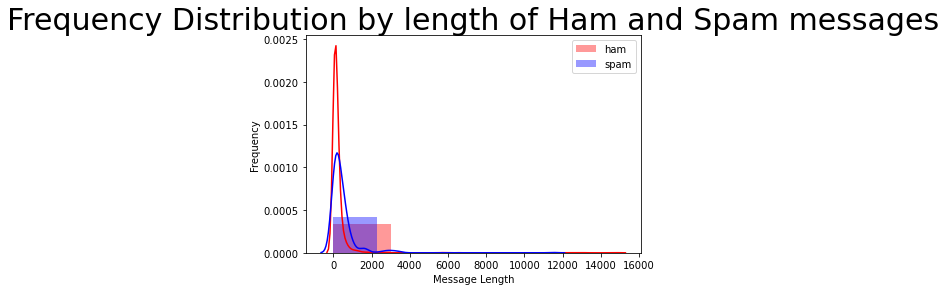

In [28]:
#Frequency distribution of e-mails length of both categories
sns.distplot(ham_count,bins=5,label='ham',color='red')
sns.distplot(spam_count,bins=5,label='spam',color='blue')
plt.title("Frequency Distribution by length of Ham and Spam messages",fontsize=30)
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Message Length")

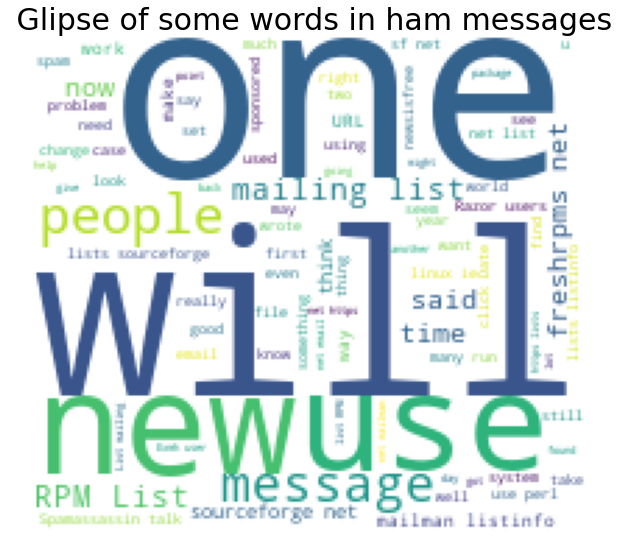

In [29]:
#wordcloud representing the ham e-mails

plt.figure(figsize=(10,10))


sub_set = ham
text = sub_set.message
cloud_ham = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          #collocations=False,
                          width=200,
                          height=180,
                          min_font_size=3
                          ).generate(" ".join(text))

plt.axis('off')
plt.title(" Glipse of some words in ham messages",fontsize=30)
plt.imshow(cloud_ham)


In [30]:
!pip3 install wordcloud

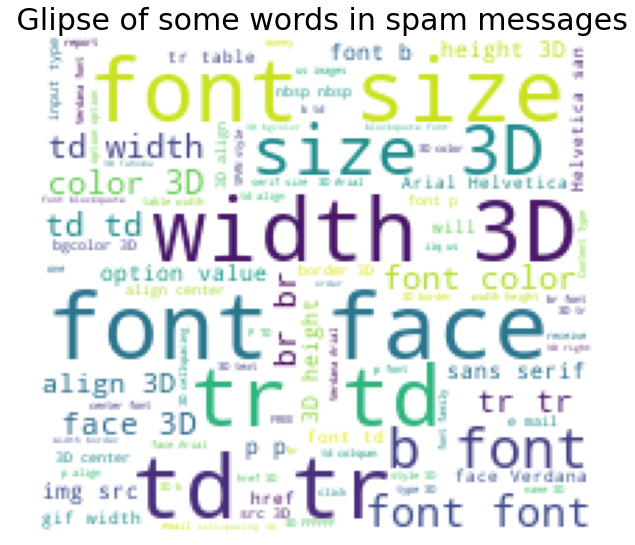

In [31]:
#wordcloud representing the spam e-mails

plt.figure(figsize=(10,10))


sub_set_spam = spam
text_spam = sub_set_spam.message
cloud_spam = WordCloud(
                          
                          background_color='white',
                          collocations=True,
                          width=200,
                          height=180,
                          min_font_size=3
                         ).generate(" ".join(text_spam))
plt.axis('off')
plt.title(" Glipse of some words in spam messages",fontsize=30)

plt.imshow(cloud_spam)

In [32]:
#Counting the most occuring words in ham e-mails
from collections import Counter
count1_ham=Counter(" ".join(dataset[dataset['class']=='ham']['message']).split()).most_common(50)
data1=pd.DataFrame.from_dict(count1_ham,)
data1.rename(columns={0:'words',1:'Frequency'},inplace=True)
print("Top 10 Words in ham messages")
print(data1)


Top 10 Words in ham messages
    words  Frequency
0     the      20532
1       >      18056
2      to      12736
3      of      10466
4     and       9978
5       a       9852
6      in       6420
7      is       6118
8    that       5405
9       I       5253
10    for       4392
11     it       3658
12     on       3226
13   with       2967
14     be       2720
15    you       2599
16   have       2572
17    are       2393
18   this       2366
19     as       2255
20    The       2103
21   from       2102
22    not       2087
23     at       1964
24    was       1924
25     or       1886
26    but       1792
27     an       1683
28     by       1604
29     --       1506
30      -       1499
31    can       1421
32    has       1399
33   they       1291
34     my       1276
35   will       1272
36    all       1238
37     if       1232
38  about       1199
39   more       1083
40   just       1056
41     we       1056
42  would       1052
43     >>       1037
44  their       1009
45   

In [33]:
dataset.head(10)

,message,class,mails_length
emails/spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",spam,3966
emails/spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam,820
emails/spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam,669
emails/spam,##############################################...,spam,3004
emails/spam,I thought you might like these:\n\n1) Slim Dow...,spam,687
emails/spam,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,spam,2456
emails/spam,Help wanted. We are a 14 year old fortune 500...,spam,714
emails/spam,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,spam,30266
emails/spam,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,spam,2915
emails/spam,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",spam,2276


In [34]:
#Counting the most occuring words in spam e-mails
count1_spam=Counter(" ".join(dataset[dataset['class']=='spam']['message']).split()).most_common(10)
data2=pd.DataFrame.from_dict(count1_spam)
data2.rename(columns={0:'words',1:'Frequency'},inplace=True)
print("Top 10 Words in Spam mails")
print(data2)

Top 10 Words in Spam mails
  words  Frequency
0   the       5028
1    to       4335
2   and       3444
3    of       3362
4   you       2442
5     =       2241
6     a       2122
7    in       1892
8   for       1819
9  your       1525


In [35]:
#data pre-processing


In [36]:
#cleaning of dataset
def remove_whitespace(text):
    return  " ".join(text.split())

dataset['message']=dataset['message'].apply(remove_whitespace)
print(dataset['message'])

emails/spam    <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
emails/spam    1) Fight The Risk of Cancer! http://www.adclic...
emails/spam    1) Fight The Risk of Cancer! http://www.adclic...
emails/spam    ##############################################...
emails/spam    I thought you might like these: 1) Slim Down -...
                                     ...                        
emails/ham     Man killed 'trying to surf' on Tube train Anan...
emails/ham     Hi Gianni, A very good resource for this is: h...
emails/ham     Gianni Ponzi wrote: > I have a prob when tryin...
emails/ham     Neale Pickett <neale@woozle.org> writes: > Ski...
emails/ham     Hi, I think you need to give us a little more ...
Name: message, Length: 3000, dtype: object


In [37]:
#converting the comment_text in lower case
dataset['message']=dataset['message'].str.lower()
dataset.head()

,message,class,mails_length
emails/spam,"<!doctype html public ""-//w3c//dtd html 4.0 tr...",spam,3966
emails/spam,1) fight the risk of cancer! http://www.adclic...,spam,820
emails/spam,1) fight the risk of cancer! http://www.adclic...,spam,669
emails/spam,##############################################...,spam,3004
emails/spam,i thought you might like these: 1) slim down -...,spam,687


In [38]:
#handling all the numeric values and special character
def text_preprocess(sen): 

   sen = re.sub('[^a-zA-Z]', ' ', sen)

   sen = re.sub(r"\s+[a-zA-Z]\s+", ' ', sen)

   sen = re.sub(r'\s+', ' ', sen)

   return sen

In [39]:
import re
X_messages = [] 
messages = list(dataset['message']) 
for mes in messages: 
    X_messages.append(text_preprocess(mes))

In [40]:
dataset['message']=X_messages

In [41]:
dataset.head()

,message,class,mails_length
emails/spam,doctype html public c dtd html transitional e...,spam,3966
emails/spam,fight the risk of cancer http www adclick ws ...,spam,820
emails/spam,fight the risk of cancer http www adclick ws ...,spam,669
emails/spam,adult club offers free membership instant acc...,spam,3004
emails/spam,i thought you might like these slim down guara...,spam,687


In [42]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Srinivas
[nltk_data]     Aravind\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
#pre-processing of dataset
#tokenisation
from nltk import word_tokenize
#print(df['comment_text'])
dataset['message']=dataset['message'].apply(lambda X: word_tokenize(X))
#df.head()

In [44]:
dataset.head()

,message,class,mails_length
emails/spam,"[doctype, html, public, c, dtd, html, transiti...",spam,3966
emails/spam,"[fight, the, risk, of, cancer, http, www, adcl...",spam,820
emails/spam,"[fight, the, risk, of, cancer, http, www, adcl...",spam,669
emails/spam,"[adult, club, offers, free, membership, instan...",spam,3004
emails/spam,"[i, thought, you, might, like, these, slim, do...",spam,687


In [45]:
from nltk.corpus import stopwords

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Srinivas
[nltk_data]     Aravind\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
#removing stopwords
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
            
    return result

In [48]:
dataset['message'] = dataset['message'].apply(remove_stopwords)

In [49]:
dataset.head()

,message,class,mails_length
emails/spam,"[doctype, html, public, c, dtd, html, transiti...",spam,3966
emails/spam,"[fight, risk, cancer, http, www, adclick, ws, ...",spam,820
emails/spam,"[fight, risk, cancer, http, www, adclick, ws, ...",spam,669
emails/spam,"[adult, club, offers, free, membership, instan...",spam,3004
emails/spam,"[thought, might, like, slim, guaranteed, lose,...",spam,687


In [50]:
#performing lemmatization
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag

def lemmatization(text):
    
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos=tag[0].lower()
        
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
            
        result.append(wordnet.lemmatize(token,pos))
    
    return result

In [51]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Srinivas Aravind\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Srinivas
[nltk_data]     Aravind\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
dataset['message']=dataset['message'].apply(lemmatization)

In [53]:
dataset.head()

,message,class,mails_length
emails/spam,"[doctype, html, public, c, dtd, html, transiti...",spam,3966
emails/spam,"[fight, risk, cancer, http, www, adclick, w, c...",spam,820
emails/spam,"[fight, risk, cancer, http, www, adclick, w, c...",spam,669
emails/spam,"[adult, club, offer, free, membership, instant...",spam,3004
emails/spam,"[thought, might, like, slim, guarantee, lose, ...",spam,687


In [54]:
#adding a new column after data pre-processing
dataset['new_mails_length'] = dataset['message'].apply(len)
dataset.head()

,message,class,mails_length,new_mails_length
emails/spam,"[doctype, html, public, c, dtd, html, transiti...",spam,3966,409
emails/spam,"[fight, risk, cancer, http, www, adclick, w, c...",spam,820,98
emails/spam,"[fight, risk, cancer, http, www, adclick, w, c...",spam,669,77
emails/spam,"[adult, club, offer, free, membership, instant...",spam,3004,220
emails/spam,"[thought, might, like, slim, guarantee, lose, ...",spam,687,85


In [55]:
dataset.groupby('class').describe()

mails_length                                                           \
             count       mean           std   min      25%     50%      75%   
class                                                                         
ham         2500.0  1486.1104   3475.300719  54.0   459.75   899.0  1567.50   
spam         500.0  5746.9680  15861.429791  65.0  1082.00  2578.5  5619.75   

                new_mails_length                                           \
            max            count      mean          std  min   25%    50%   
class                                                                       
ham     89733.0           2500.0  132.1884   301.465273  6.0  43.0   81.0   
spam   234358.0            500.0  580.9840  1788.388018  8.0  98.0  223.5   

                       
         75%      max  
class                  
ham    139.0   7528.0  
spam   555.0  23677.0

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, emails/spam to emails/ham
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   message           3000 non-null   object
 1   class             3000 non-null   object
 2   mails_length      3000 non-null   int64 
 3   new_mails_length  3000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 117.2+ KB


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
#Creating the tf-idf vectorizer object
tfidf_vec = TfidfVectorizer(max_df=0.7,stop_words='english',lowercase=False)

In [59]:
tfidf_vec

TfidfVectorizer(lowercase=False, max_df=0.7, stop_words='english')

In [60]:
#importing train and test split modules
from sklearn.model_selection import train_test_split

In [61]:
#selecting the feature that is e-mails
X=dataset['message']

In [62]:
X.head()

emails/spam    [doctype, html, public, c, dtd, html, transiti...
emails/spam    [fight, risk, cancer, http, www, adclick, w, c...
emails/spam    [fight, risk, cancer, http, www, adclick, w, c...
emails/spam    [adult, club, offer, free, membership, instant...
emails/spam    [thought, might, like, slim, guarantee, lose, ...
Name: message, dtype: object

In [63]:
#Deciding the target category
y=dataset['class']

In [64]:
y.head()

emails/spam    spam
emails/spam    spam
emails/spam    spam
emails/spam    spam
emails/spam    spam
Name: class, dtype: object

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:

#splitting the data in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#applying tf-idf vectorizer on x_train and x_test data
X_train_vec = tfidf_vec.fit_transform(X_train.astype('str'))
X_test_vec = tfidf_vec.transform(X_test.astype('str'))

#applying multinomial Naive Bayes algorithm
nb = MultinomialNB()
nb.fit(X_train_vec,y_train)

#Predicting the data
predictions = nb.predict(X_test_vec)
#Generating Confusion Matrix
print("confusion Matrix")
print(confusion_matrix(y_test,predictions))
#Generating Classification Report
print("Classification Report")
print(classification_report(y_test,predictions))
#prob_stoxic = np.predict_proba(X_test_vec)

confusion Matrix
[[738   0]
 [ 83  79]]
Classification Report
              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       738
        spam       1.00      0.49      0.66       162

    accuracy                           0.91       900
   macro avg       0.95      0.74      0.80       900
weighted avg       0.92      0.91      0.89       900



In [67]:
#importing the accuracy metric
from sklearn.metrics import accuracy_score

In [68]:
#Calculating the accuracy of the model
accuracy_score(y_test,predictions)

0.9077777777777778

In [69]:
#forming the dataframe of predicted output
predicted=pd.DataFrame(predictions,columns=['Predicted'])

In [70]:
predicted.head()

,Predicted
0,ham
1,ham
2,ham
3,spam
4,ham


In [71]:
actual=pd.DataFrame(y_test)

In [72]:
actual.head()

,class
emails/ham,ham
emails/ham,ham
emails/ham,ham
emails/spam,spam
emails/ham,ham


In [73]:
actual.head()
actual['numbers']=np.arange(0,900)

In [74]:
actual.head()

,class,numbers
emails/ham,ham,0
emails/ham,ham,1
emails/ham,ham,2
emails/spam,spam,3
emails/ham,ham,4


In [75]:
actual.set_index('numbers',inplace=True)

In [76]:
#Dataframe containg both actual and predicted data
predicted_final_dataset = pd.concat([actual,predicted],axis=1)

In [77]:
predicted_final_dataset.head(10)

,class,Predicted
0,ham,ham
1,ham,ham
2,ham,ham
3,spam,spam
4,ham,ham
5,ham,ham
6,ham,ham
7,ham,ham
8,spam,ham
9,ham,ham


In [78]:
#end